In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv("C:/Users/2068671/OneDrive - Cognizant/Desktop/HR.csv", header = 0)

In [114]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [115]:
df.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [116]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Imbalanced data- Using SMOTETomek to achieve some balance

In [2]:
pip install imblearn --user

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.0.2-cp39-cp39-win_amd64.whl (7.2 MB)



In [110]:
from imblearn.combine import SMOTETomek 

In [111]:
sm = SMOTETomek(sampling_strategy= 0.5)

In [118]:
df["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

There are so many departments; Hence One Hot Encoding is not used.  We use targeted encoding, ranking the departments based on the attrition

In [119]:
ordinal_labels = df.groupby("Department")["left"].mean().sort_values(ascending = False).index
ordinal_labels

Index(['hr', 'accounting', 'technical', 'support', 'sales', 'marketing', 'IT',
       'product_mng', 'RandD', 'management'],
      dtype='object', name='Department')

In [120]:
enumerate(ordinal_labels, 0)

In [121]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels, 0)}
ordinal_labels2

{'hr': 0,
 'accounting': 1,
 'technical': 2,
 'support': 3,
 'sales': 4,
 'marketing': 5,
 'IT': 6,
 'product_mng': 7,
 'RandD': 8,
 'management': 9}

In [122]:
df["department_label"] = df["Department"].map(ordinal_labels2)

In [123]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,department_label
0,0.38,0.53,2,157,3,0,1,0,sales,low,4
1,0.80,0.86,5,262,6,0,1,0,sales,medium,4
2,0.11,0.88,7,272,4,0,1,0,sales,medium,4
3,0.72,0.87,5,223,5,0,1,0,sales,low,4
4,0.37,0.52,2,159,3,0,1,0,sales,low,4


In [124]:
df.drop("Department", axis = 1, inplace= True)

In [125]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_label
0,0.38,0.53,2,157,3,0,1,0,low,4
1,0.80,0.86,5,262,6,0,1,0,medium,4
2,0.11,0.88,7,272,4,0,1,0,medium,4
3,0.72,0.87,5,223,5,0,1,0,low,4
4,0.37,0.52,2,159,3,0,1,0,low,4


In [126]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Here since the categories are less we use One Hot Encoding

In [127]:
df1 = pd.get_dummies(df.salary, drop_first= True)

In [128]:
final = pd.concat([df, df1], axis = 'columns')

In [129]:
final.drop("salary", axis = 1, inplace = True)

In [130]:
final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_label,low,medium
0,0.38,0.53,2,157,3,0,1,0,4,1,0
1,0.80,0.86,5,262,6,0,1,0,4,0,1
2,0.11,0.88,7,272,4,0,1,0,4,0,1
3,0.72,0.87,5,223,5,0,1,0,4,1,0
4,0.37,0.52,2,159,3,0,1,0,4,1,0


Feature Selection

<AxesSubplot:ylabel='average_montly_hours'>

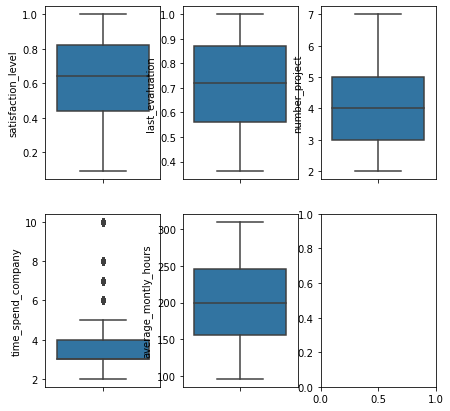

In [131]:
fig, axes = plt.subplots(2,3, figsize = (7,7))
sns.boxplot(ax = axes[0,0],y = final["satisfaction_level"])
sns.boxplot(ax = axes[0,1], y = final["last_evaluation"])
sns.boxplot(ax = axes[0,2],y = final["number_project"])
sns.boxplot(ax = axes[1,0],y = final["time_spend_company"])
sns.boxplot(ax = axes[1,1],y = final["average_montly_hours"])

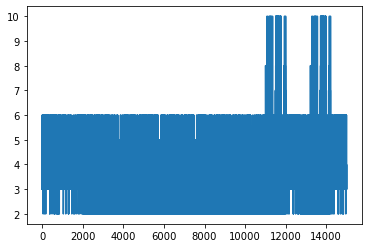

In [132]:
plt.plot(df["time_spend_company"])

Time spend in the company has outliers and hence for now we neglect the attribute

In [133]:
final.drop(["department_label", "low", "medium", "time_spend_company"], axis = 1).groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years
left,,,,,,
0,0.666810,0.715473,3.786664,199.060203,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,0.047326,0.005321


From above we conclude that satisfaction level,  promotion and monthly hours affect the attrition rate

We consider the above continous variables and the categorical variables department and salary which are already encoded

In [134]:
final = final.drop(["last_evaluation","time_spend_company", "number_project", "Work_accident"], axis = 1)

In [135]:
final

,satisfaction_level,average_montly_hours,left,promotion_last_5years,department_label,low,medium
0,0.38,157,1,0,4,1,0
1,0.80,262,1,0,4,0,1
2,0.11,272,1,0,4,0,1
3,0.72,223,1,0,4,1,0
4,0.37,159,1,0,4,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,1,0,3,1,0
14995,0.37,160,1,0,3,1,0
14996,0.37,143,1,0,3,1,0
14997,0.11,280,1,0,3,1,0


In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X = final.drop("left", axis = 1).values
Y = final["left"].values

In [138]:
X.shape

(14999, 6)

In [139]:
Y.shape

(14999,)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3)

In [141]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [142]:
pd.DataFrame(y_train).value_counts()

0    7756
1    3758
dtype: int64

In [143]:
len(y_train)

11514

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
log = LogisticRegression()

In [146]:
log.fit(X_train, y_train)

LogisticRegression()

In [147]:
y_pred = log.predict(X_test)

In [148]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [149]:
log.score(X_test, y_test)

0.7833333333333333

In [150]:
confusion_matrix(y_test, y_pred)

array([[3073,  360],
       [ 615,  452]], dtype=int64)

In [151]:
accuracy_score(y_test, y_pred)

0.7833333333333333